# Modeling Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score,mean_squared_error,

In [2]:
#load datasets

housing = pd.read_csv('../project_2/datasets/final_train.csv')

test = pd.read_csv('../project_2/datasets/final_test.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1961 non-null   int64  
 1   pid             1961 non-null   int64  
 2   ms_subclass     1961 non-null   int64  
 3   ms_zoning       1961 non-null   object 
 4   lot_area        1961 non-null   float64
 5   lot_shape       1961 non-null   int64  
 6   lot_config      1961 non-null   object 
 7   neighborhood    1961 non-null   object 
 8   house_style     1961 non-null   object 
 9   overall_qual    1961 non-null   int64  
 10  overall_cond    1961 non-null   int64  
 11  year_built      1961 non-null   int64  
 12  year_remod/add  1961 non-null   int64  
 13  exterior_1st    1961 non-null   object 
 14  mas_vnr_type    1961 non-null   object 
 15  mas_vnr_area    1961 non-null   float64
 16  foundation      1961 non-null   object 
 17  bsmtfin_sf_1    1961 non-null   f

In [4]:
housing.shape

(1961, 36)

In [5]:
#transform ID to string and drop PID

housing['id'] = housing.id.apply(lambda x: str(x))
housing = housing.drop(columns='pid')
test['id'] = test.id.apply(lambda x: str(x))
test = test.drop(columns='pid')

In [6]:
housing.shape

(1961, 35)

In [7]:
test.shape

(878, 34)

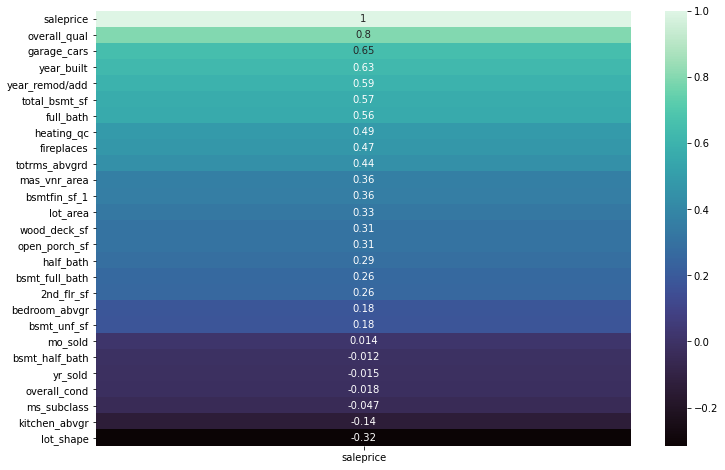

In [8]:
# visualise correlation to target 'saleprice'
corr_df = pd.DataFrame(housing.corr()['saleprice'])
corr_df = corr_df.sort_values(by='saleprice',ascending=False)
plt.figure(figsize=(12,8))

sns.heatmap(corr_df,annot=True,cmap='mako');


In [9]:
housing.iloc[:,1:housing.shape[0]]

,ms_subclass,ms_zoning,lot_area,lot_shape,lot_config,neighborhood,house_style,overall_qual,overall_cond,year_built,...,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,saleprice
0,60,RL,9.511703,3,CulDSac,Sawyer,2Story,6,8,1976,...,3,1,6,0,2.0,0,44,3,2010,11.779129
1,60,RL,9.349406,3,CulDSac,SawyerW,2Story,7,5,1996,...,4,1,8,1,2.0,0,74,4,2009,12.301383
2,20,RL,8.977399,4,Inside,NAmes,1Story,5,7,1953,...,3,1,5,0,1.0,0,52,1,2010,11.599103
3,60,RL,9.190342,4,Inside,Timber,2Story,5,5,2006,...,3,1,7,0,2.0,100,0,4,2010,12.066811
4,50,RL,9.563459,3,Inside,SawyerW,1.5Fin,6,8,1900,...,3,1,6,0,2.0,0,59,3,2010,11.838626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,20,RL,9.345658,3,Inside,Timber,1Story,8,5,2007,...,3,1,7,1,2.0,0,276,1,2008,12.607366
1957,30,RL,9.420763,3,Inside,Edwards,1Story,4,5,1940,...,1,1,4,0,2.0,158,0,3,2009,11.320554
1958,50,RL,8.930362,4,Inside,Crawfor,1.5Fin,6,6,1928,...,3,1,9,1,2.0,0,0,3,2009,12.083905
1959,20,RL,9.249561,4,Corner,NAmes,1Story,4,5,1956,...,3,1,6,2,1.0,0,189,11,2009,11.877569


In [10]:
#create dummies for categorical features in train and test datasets

#group categorical data
categorical_df = housing.iloc[:,1:housing.shape[0]].select_dtypes(exclude=np.number)
test_cat_df = test.iloc[:,1:test.shape[0]].select_dtypes(exclude=np.number)

dummies = pd.get_dummies(categorical_df, prefix_sep='_')
test_dummies = pd.get_dummies(test_cat_df, prefix_sep='_')


In [11]:
categorical_df.shape

(1961, 7)

In [12]:
dummies.shape

(1961, 73)

In [13]:
test_dummies.head()

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,lot_config_Corner,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,...,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [14]:
#group  numerical data to create X variable for train dataset
numerical_df = housing.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns='saleprice')

#group numerical data X variables for test dataset
test_numerical_df = test.select_dtypes(include=np.number)

In [15]:
numerical_df.head()

,ms_subclass,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,...,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,wood_deck_sf,open_porch_sf,mo_sold,yr_sold
0,60,9.511703,3,6,8,1976,2005,289.0,533.0,192.0,...,1,3,1,6,0,2.0,0,44,3,2010
1,60,9.349406,3,7,5,1996,1997,132.0,637.0,276.0,...,1,4,1,8,1,2.0,0,74,4,2009
2,20,8.977399,4,5,7,1953,2007,0.0,731.0,326.0,...,0,3,1,5,0,1.0,0,52,1,2010
3,60,9.190342,4,5,5,2006,2007,0.0,0.0,384.0,...,1,3,1,7,0,2.0,100,0,4,2010
4,50,9.563459,3,6,8,1900,1993,0.0,0.0,676.0,...,0,3,1,6,0,2.0,0,59,3,2010


In [16]:
#concat the dummies df with numerical df
X_train = pd.concat([numerical_df,dummies],axis=1)
X_train_id = housing['id']
X_test_df = pd.concat([test_numerical_df,test_dummies],axis=1)
X_test_df_id = test['id']

In [17]:
X_train.head()

,ms_subclass,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,...,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood
0,60,9.511703,3,6,8,1976,2005,289.0,533.0,192.0,...,0,1,0,0,0,1,0,0,0,0
1,60,9.349406,3,7,5,1996,1997,132.0,637.0,276.0,...,0,1,0,0,0,0,1,0,0,0
2,20,8.977399,4,5,7,1953,2007,0.0,731.0,326.0,...,0,0,1,0,0,1,0,0,0,0
3,60,9.190342,4,5,5,2006,2007,0.0,0.0,384.0,...,0,0,1,0,0,0,1,0,0,0
4,50,9.563459,3,6,8,1900,1993,0.0,0.0,676.0,...,0,0,1,0,0,0,1,0,0,0


In [18]:
y_target = housing.saleprice

In [19]:
X_train.shape

(1961, 99)

In [20]:
y_target.shape

(1961,)

In [21]:
#check shape of train and test
print (X_train.shape)
print (X_test_df.shape)

(1961, 99)
(878, 95)


<b>observation</b>: some columns exist in training set and not in test set

In [22]:
missing_col = X_train.columns.difference(X_test_df.columns)

In [23]:
X_train.drop(columns=missing_col, inplace=True)

In [24]:
X_train.shape

(1961, 93)

Columns that X_train had that X_test did not have, has been dropped. 

In [25]:
missing_col = X_test_df.columns.difference(X_train.columns)

In [26]:
for x in missing_col:
    if x in X_test_df.columns:
        X_test_df.drop(columns=x, inplace=True)
    else:
        pass

In [27]:
X_test_df.shape

(878, 93)

Columns that X_test had that X_train did not have, has been dropped. We will also check rows for empty val.

In [28]:
null_data = X_test_df[X_test_df.isnull().any(axis=1)]

In [29]:
null_data

,ms_subclass,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmt_unf_sf,...,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood
865,60,9.076695,4,7,5,2002,2002,NaN,0,840,...,0,0,0,0,0,0,1,0,0,0


In [30]:
X_test_df.mas_vnr_area.fillna(X_test_df.mas_vnr_area.mean(),inplace=True)

In [31]:
X_test_df.shape

(878, 93)

In [32]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 93 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ms_subclass           878 non-null    int64  
 1   lot_area              878 non-null    float64
 2   lot_shape             878 non-null    int64  
 3   overall_qual          878 non-null    int64  
 4   overall_cond          878 non-null    int64  
 5   year_built            878 non-null    int64  
 6   year_remod/add        878 non-null    int64  
 7   mas_vnr_area          878 non-null    float64
 8   bsmtfin_sf_1          878 non-null    int64  
 9   bsmt_unf_sf           878 non-null    int64  
 10  total_bsmt_sf         878 non-null    int64  
 11  heating_qc            878 non-null    int64  
 12  2nd_flr_sf            878 non-null    int64  
 13  bsmt_full_bath        878 non-null    int64  
 14  bsmt_half_bath        878 non-null    int64  
 15  full_bath             8

In [33]:
y_target.shape

(1961,)

# Instantiate Linear Model

now that both train and test datasets have the same variables, and the target variable has been set. we can instatiate our models. The first model that will test the datasets on will be the a simple linear regression model.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_target, random_state =42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [35]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [36]:
lr.score(X_train_scaled,y_train)

0.881892339378614

In [37]:
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
lr_scores.mean()

-4.12228637329369e+18

In [38]:
y_pred = lr.predict(X_test_scaled)

In [39]:
# Check the MSE on the training and testing sets.
print(f'MSE on testing set: {mean_squared_error(lr.predict(X_train),y_train)}')
print(f'MSE on training set: {mean_squared_error( y_pred,y_test)}')

MSE on testing set: 6.572824536029952e+22
MSE on training set: 614215577954399.5


In [40]:
# Check the R^2 on the training and testing sets.

print(f'R^2 on testing set: {r2_score(y_test, y_pred)}')
print(f'R^2 on training set: {r2_score(y_train, lr.predict(X_train_scaled))}')

R^2 on testing set: -4044593241872537.0
R^2 on training set: 0.881892339378614


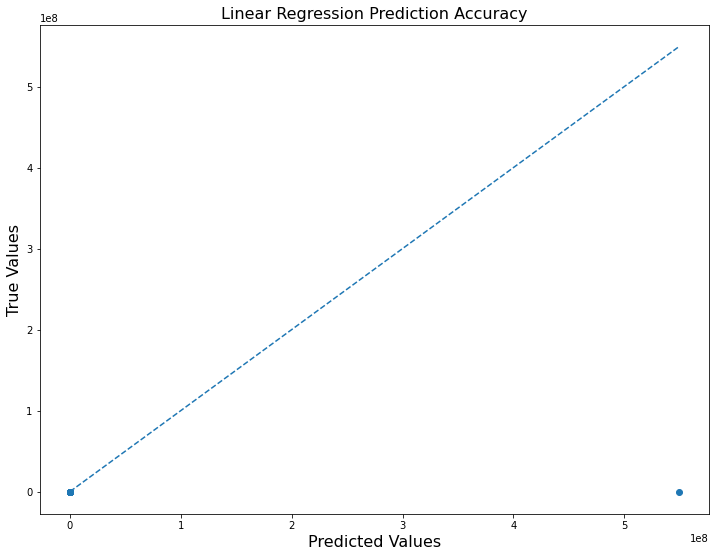

In [41]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(y_pred,y_test)

# Line showing perfect predictions.
plt.plot([0, max(max(y_pred),max(y_test))],
         [0, max(max(y_pred),max(y_test))],
         linestyle = '--')

plt.title('Linear Regression Prediction Accuracy', fontsize = 16)
plt.xlabel('Predicted Values', fontsize = 16)
plt.ylabel('True Values', fontsize = 16);

In [42]:
lr.coef_

array([-8.63683981e-03,  6.04146279e-02,  5.28975341e-03,  9.55941047e-02,
        4.57179393e-02,  5.68946895e-02,  2.51351709e-02, -4.43803547e-03,
       -4.40816972e-03, -1.72751482e-02,  4.75685700e-02,  1.76068293e-02,
        5.29517081e-02,  2.72467587e-02,  1.68285659e-03,  2.90565651e-02,
        4.39680210e-03,  1.27446209e-02, -1.55015517e-02,  2.42610528e-02,
        3.06633018e-02,  4.11211341e-02,  6.21615976e-03, -3.74037965e-04,
        3.17672621e-03, -2.86257295e-03, -1.38458079e-02,  2.61580472e-02,
        5.49162862e+08,  1.09072990e-02,  4.19250491e-02,  3.79834920e-02,
       -4.70969033e+10, -2.96591388e+10, -2.10537768e+10, -8.05726095e+09,
       -5.52806634e+10, -2.50109999e-02, -1.58791759e-02, -3.61440798e-02,
       -6.49537125e-02, -3.04837940e-02, -8.85395350e-02, -3.90436712e-02,
       -1.07457569e-01, -8.17460774e-02, -5.88506241e-03, -6.99378844e-02,
       -4.07892644e-02, -6.79258896e-02, -1.17697566e-01, -2.73736794e-02,
       -6.88464428e-02, -

<b> observation </b>: Based on scores (R Squared and MSE) the model performed poorly. This is expected as the Linear Regression model is a simple model and could not handle high complexity i.e too many variables. We can see this from the extreme values in the coeeficients of the model.

Further more, the y-target variable has been transformed with a log function, and would therefore would not predict values very well. 

Other models will be tested on the data sets.

# Instantiate Ridge Model

In [43]:
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train_scaled,y_train)

print(f'R^2 on testing set: {ridge_model.score(X_test_scaled, y_test)}')
print(f'R^2 on training set: {ridge_model.score(X_train_scaled, y_train)}')

R^2 on testing set: 0.8560188383127525
R^2 on training set: 0.8528691422009256


In [44]:
ridge_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=3)
ridge_scores.mean()

0.8230125746547964

<b> observation </b>: the score we get from a random alpha returned a rather good score for both sets. However this score is based on R square, and we want the model to be based on MSE. Additionally the most optimum alpha may not have been used. A ridge CV model shall be instantiated.

In [45]:
# Set up a list of ridge alphas to check.
ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_scaled,y_train)

r_alphas = np.logspace(0, 5, 10000)

ridge_cv = RidgeCV(alphas=r_alphas, scoring='mse', cv=10)

In [46]:
# Fit model using best ridge alpha
ridge_cv = ridge_model.fit(X_train_scaled, y_train)

In [47]:
ridge_cv.alpha

10

In [48]:
#calculate ridge model's prediction for mse score
r_y_train_pred = ridge_cv.predict(X_train_scaled)
r_y_test_pred = ridge_cv.predict(X_test_scaled)

In [49]:
print(f'MSE on testing set: {mean_squared_error(r_y_test_pred,y_test)}')
print(f'MSE on training set: {mean_squared_error(r_y_train_pred, y_train)}')

MSE on testing set: 0.017206464428679086
MSE on training set: 0.015547578232058351


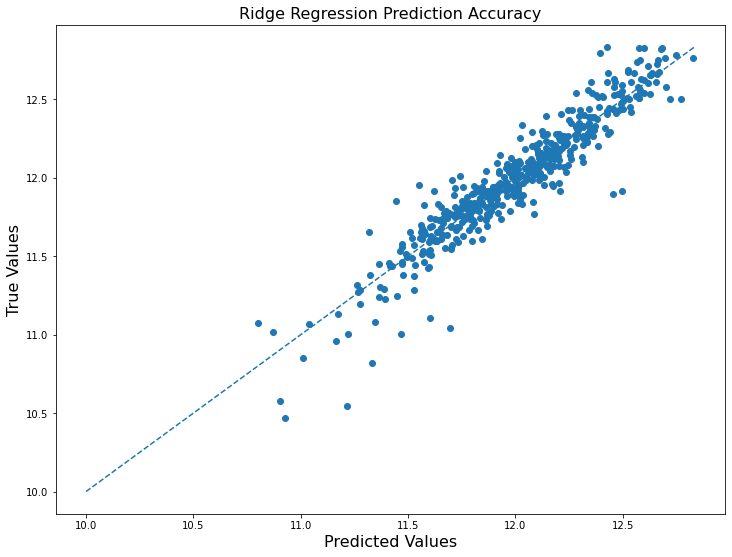

In [91]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(r_y_test_pred,y_test)

# Line showing perfect predictions.
plt.plot([10, max(max(r_y_test_pred),max(y_test))],
         [10, max(max(r_y_test_pred),max(y_test))],
         linestyle = '--')

plt.title('Ridge Regression Prediction Accuracy', fontsize = 16)
plt.xlabel('Predicted Values', fontsize = 16)
plt.ylabel('True Values', fontsize = 16);

In [51]:
ridge_cv.coef_

array([-7.32626355e-03,  5.98760046e-02,  4.28898614e-03,  9.55059078e-02,
        4.49524346e-02,  5.57260237e-02,  2.55278870e-02, -4.18236913e-03,
       -1.10567003e-03, -1.48776791e-02,  4.38350225e-02,  1.81395635e-02,
        4.86107534e-02,  2.66404453e-02,  1.40061899e-03,  3.02138116e-02,
        5.59160620e-03,  1.22556984e-02, -1.63062768e-02,  2.49239697e-02,
        3.06478668e-02,  4.08550862e-02,  5.98621859e-03, -4.93628092e-04,
        3.59893528e-03, -3.29825762e-03, -2.19281091e-02,  6.33298429e-03,
        0.00000000e+00,  5.48147062e-03,  4.53531857e-03,  6.59575126e-03,
       -9.36312604e-04,  7.19848595e-03, -5.98975872e-03, -5.66839576e-03,
        4.29683208e-05,  6.89636563e-04, -2.02742944e-03, -1.26127050e-02,
       -1.48515536e-02, -1.25478748e-03, -1.95569177e-02,  5.96247216e-03,
       -4.37704765e-02, -2.54162441e-02,  5.04296633e-03, -2.73817725e-02,
       -1.46206317e-02, -1.74556102e-02, -2.83516818e-02, -3.90913589e-03,
       -2.11113499e-02,  

<b>observation</b>: after performing cross val on ridge regularization and optimising the model by using alpha, the MSE score on both training and test set had dramatically improved.

Some variable coefficient has shrunk to zero, and the remaining coefficients are very close to zero as well. 

A lasso regression model is also available for our model to train on.

In [52]:
print(" MSE Score".center(30, " "))
print(" Linear Model ".center(30, "="))
print(f'testing set: {mean_squared_error(y_pred,y_test)}')
print(f'training set: {mean_squared_error(lr.predict(X_train),y_train)}')
print('\n')
print(" Ridge ".center(30, "="))
print(f'testing set: {mean_squared_error(r_y_test_pred,y_test)}')
print(f'training set: {mean_squared_error(r_y_train_pred, y_train)}')

           MSE Score          
======== Linear Model ========
testing set: 614215577954399.5
training set: 6.572824536029952e+22


=========== Ridge ============
testing set: 0.017206464428679086
training set: 0.015547578232058351


# Instantiate Lasso Model

In [53]:
#instantiate lasso model
lasso_model = Lasso()

#train data on model
lasso_model.fit(X_train_scaled,y_train)

#show score
print(f'R^2 on testing set: {lasso_model.score(X_test_scaled, y_test)}')
print(f'R^2 on training set: {lasso_model.score(X_train_scaled, y_train)}')

R^2 on testing set: -7.161495010343799e-07
R^2 on training set: 0.0


<b>observation</b>: Using the default alpha, the Lasso Model returned a good R squared score but returned a lower score compared to ridge.

Similar to ridge, we conduct a cross valadiation to find the optimal alpha.

In [54]:
#list out all opssible alphas available
l_alphas = np.logspace(-10, 0, 1000)

# Cross-validate
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=1000)

lasso_cv = lasso_model.fit(X_train_scaled, y_train)

In [55]:
lasso_cv.alpha

1.0

In [56]:
print(f'R^2 on testing set: {lasso_cv.score(X_test_scaled, y_test)}')
print(f'R^2 on training set: {lasso_cv.score(X_train_scaled, y_train)}')

R^2 on testing set: -7.161495010343799e-07
R^2 on training set: 0.0


In [57]:
#calculate model's prediction for mse score
l_y_train_pred = lasso_cv.predict(X_train_scaled)
l_y_test_pred = lasso_cv.predict(X_test_scaled)

In [58]:
print(f'MSE on testing set: {mean_squared_error(l_y_test_pred,y_test)}')
print(f'MSE on training set: {mean_squared_error(l_y_train_pred,y_train)}')

MSE on testing set: 0.15186101076018557
MSE on training set: 0.1305923755120875


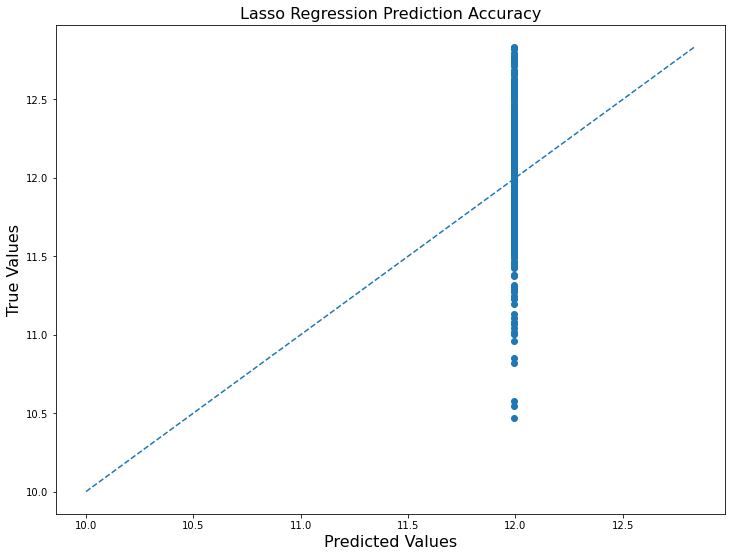

In [92]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(l_y_test_pred,y_test)

# Line showing perfect predictions.
plt.plot([10, max(max(l_y_test_pred),max(y_test))],
         [10, max(max(l_y_test_pred),max(y_test))],
         linestyle = '--')

plt.title('Lasso Regression Prediction Accuracy', fontsize = 16)
plt.xlabel('Predicted Values', fontsize = 16)
plt.ylabel('True Values', fontsize = 16);

In [60]:
lasso_cv.coef_

array([-0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
       -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0., -0.,
        0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
       -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,
        0., -0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
       -0.,  0.])

<b>observation</b>: We find that the optimum alpha to tune the Lasso model is the same as the default number set for alpha in the previous model, and thefore the model's hyparameter could not tune further to improve its score.

The MSE score for the Lasso model performed better than the Linear model, but worse than the Ridge Model. 

The regularization method had force all the coeeficients to be zero. This is therefore a poor model to use.

Lastly, the ElasticNet model is the last model we can train our data on. 

In [61]:
print(" MSE Score".center(30, " "))
print(" Linear Model ".center(30, "="))
print(f'testing set: {mean_squared_error(y_pred,y_test)}')
print(f'training set: {mean_squared_error(lr.predict(X_train),y_train)}')
print('\n')
print(" Ridge ".center(30, "="))
print(f'testing set: {mean_squared_error(r_y_test_pred,y_test)}')
print(f'training set: {mean_squared_error(r_y_train_pred, y_train)}')
print('\n')
print(" Lasso ".center(30, "="))
print(f'testing set: {mean_squared_error(l_y_test_pred,y_test)}')
print(f'training set: {mean_squared_error(l_y_train_pred,y_train)}')

           MSE Score          
======== Linear Model ========
testing set: 614215577954399.5
training set: 6.572824536029952e+22


=========== Ridge ============
testing set: 0.017206464428679086
training set: 0.015547578232058351


=========== Lasso ============
testing set: 0.15186101076018557
training set: 0.1305923755120875


# Instantiate ElasticNet Model

The ElasticNet is a combination of the lasso and ridge regression model's penalty paramater, and the ratio of their indivudal alphas can be tuned according. This is also denoted by an alpha, we shall find the most optimum alpha and apply it the model.

In [62]:
# Set alpha to be between 0.5 to 1.
e_alphas = np.linspace(0.5, 1.0, 100)

# Set up ratio to be 0.7
e_ratio = 0.3

# Instantiate model with cross cal.
enet_model = ElasticNetCV(alphas=e_alphas, l1_ratio=e_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train_scaled, y_train)


In [63]:
enet_model.alpha_

0.5

In [64]:
print(f'R^2 on testing set: {enet_model.score(X_test_scaled, y_test)}')
print(f'R^2 on training set: {enet_model.score(X_train_scaled, y_train)}')

R^2 on testing set: 0.419018528157693
R^2 on training set: 0.4087803439730485


In [65]:
#calculate model's prediction for mse score
e_y_train_pred = enet_model.predict(X_train_scaled)
e_y_test_pred = enet_model.predict(X_test_scaled)

In [66]:
print(f'MSE on testing set: {mean_squared_error(e_y_test_pred,y_test)}')
print(f'MSE on training set: {mean_squared_error(e_y_train_pred,y_train)}')

MSE on testing set: 0.08822837036220961
MSE on training set: 0.07720877932999885


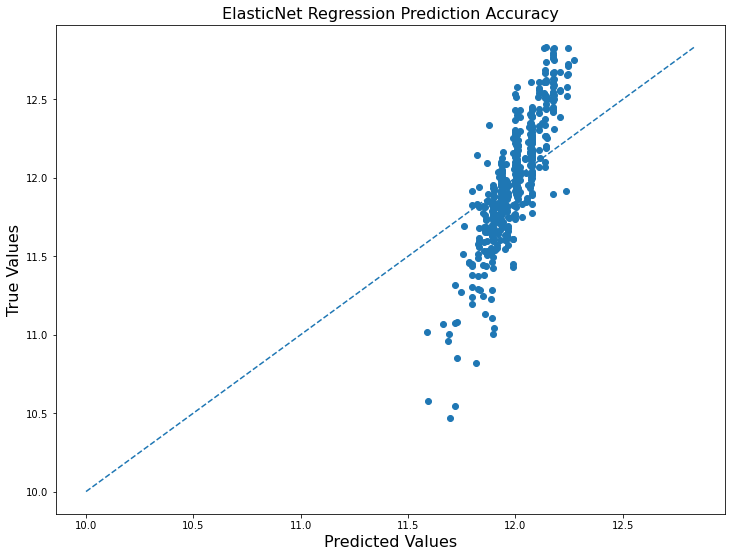

In [93]:
plt.figure(figsize = (12, 9))

plt.scatter(e_y_test_pred,y_test)

# Line showing perfect predictions.
plt.plot([10, max(max(e_y_test_pred),max(y_test))],
        [10, max(max(e_y_test_pred),max((y_test)))],
         linestyle = '--')

plt.title('ElasticNet Regression Prediction Accuracy', fontsize = 16)
plt.xlabel('Predicted Values', fontsize = 16)
plt.ylabel('True Values', fontsize = 16);

In [68]:
enet_model.coef_

array([-0.        ,  0.        , -0.        ,  0.08617862, -0.        ,
        0.00782843,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.02600591,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.  

observation: With the combination of both Lasso and Ridge regularization, the ElasticNet model performed the second best. 

From the coeeficients, we see that the method had turned most coeficients to zero and retained the strength of only 4 variables. 

In [69]:
print(" MSE Score".center(30, " "))
print(" Linear Model ".center(30, "="))
print(f'testing set: {mean_squared_error(y_pred,y_test)}')
print(f'training set: {mean_squared_error(lr.predict(X_train),y_train)}')
print('\n')
print(" Ridge ".center(30, "="))
print(f'testing set: {mean_squared_error(r_y_test_pred,y_test)}')
print(f'training set: {mean_squared_error(r_y_train_pred, y_train)}')
print('\n')
print(" Lasso ".center(30, "="))
print(f'testing set: {mean_squared_error(l_y_test_pred,y_test)}')
print(f'training set: {mean_squared_error(l_y_train_pred,y_train)}')
print('\n')
print(" ElasticNet ".center(30, "="))
print(f'testing set: {mean_squared_error(e_y_test_pred,y_test)}')
print(f'training set: {mean_squared_error(e_y_train_pred,y_train)}')

           MSE Score          
======== Linear Model ========
testing set: 614215577954399.5
training set: 6.572824536029952e+22


=========== Ridge ============
testing set: 0.017206464428679086
training set: 0.015547578232058351


=========== Lasso ============
testing set: 0.15186101076018557
training set: 0.1305923755120875


========= ElasticNet =========
testing set: 0.08822837036220961
training set: 0.07720877932999885


## Conclusion

The best model based on MSE score would be the Ridge Model. The Ridge model retains most of the coeffecients, which reflects that the model would have sensitivity for majority variables that applied through it as well shrinks the unimportant variables to zero. 

This model would therefore be the best choise to predict on unseen data.

In [70]:
X_test_df_scaled = ss.transform(X_test_df)

In [71]:
X_test_df_scaled.shape

(878, 93)

In [72]:
kaggle_answer = ridge_cv.predict(X_test_df_scaled)


In [73]:
sub_id = pd.DataFrame(X_test_df_id)

In [74]:
sub_id.head()

,id
0,2658
1,2718
2,2414
3,1989
4,625


In [75]:
kaggle_answer = np.exp(kaggle_answer)

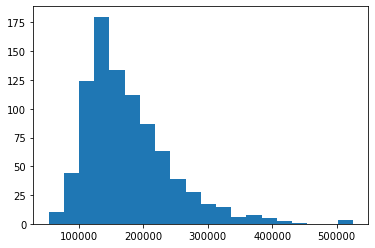

In [76]:
plt.hist(kaggle_answer,bins=20);

In [77]:
kaggle_answer = pd.DataFrame({'saleprice':kaggle_answer})

In [78]:
kaggle_answer.head()

,saleprice
0,165347.972820
1,140774.221612
2,222939.268299
3,114589.453513
4,171252.342073


In [79]:
kaggle_submission = pd.concat([sub_id,kaggle_answer],axis=1)

In [80]:
kaggle_submission.head()

,id,saleprice
0,2658,165347.972820
1,2718,140774.221612
2,2414,222939.268299
3,1989,114589.453513
4,625,171252.342073


In [81]:
pwd

'/Users/AdelAlsagoff/DSI/materials copy/project_2'

In [82]:
ls

Project_2_EDA.ipynb       README.md                 suggestions.md
Project_2_ETL.ipynb       datasets/
Project_2_Modeling.ipynb  images/


In [83]:
sample = pd.read_csv('../project_2/datasets/sample_sub_reg.csv')

In [84]:
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [85]:
kaggle_submission.rename(columns={'id':'Id','saleprice':'SalePrice'},inplace=True)

In [89]:
kaggle_submission.head()

,Id,SalePrice
0,2658,165347.972820
1,2718,140774.221612
2,2414,222939.268299
3,1989,114589.453513
4,625,171252.342073


In [87]:
kaggle_submission.to_csv('/Users/AdelAlsagoff/DSI/materials copy/project_2/datasets/kaggle_sub.csv', index = False)


In [100]:
np.exp(r_y_train_pred) - y_train

334     146935.242315
879     173045.186565
1151    193995.926387
1618    120351.340299
1287    339207.489098
            ...      
1130    174247.955620
1294    193451.758925
860     234355.141091
1459    154058.017866
1126    184727.697250
Name: saleprice, Length: 1470, dtype: float64

In [104]:
np.exp(y_train)

334     128000.0
879     172500.0
1151    168675.0
1618    110000.0
1287    342000.0
          ...   
1130    172500.0
1294    184000.0
860     228000.0
1459    147000.0
1126    185900.0
Name: saleprice, Length: 1470, dtype: float64

In [105]:
residual = np.exp(r_y_train_pred) - np.exp(y_train)
residual

334     18947.002100
879       557.244718
1151    25332.962116
1618    10362.948535
1287    -2779.768336
            ...     
1130     1760.013772
1294     9463.881616
860      6367.478192
1459     7069.916054
1126    -1160.169786
Name: saleprice, Length: 1470, dtype: float64

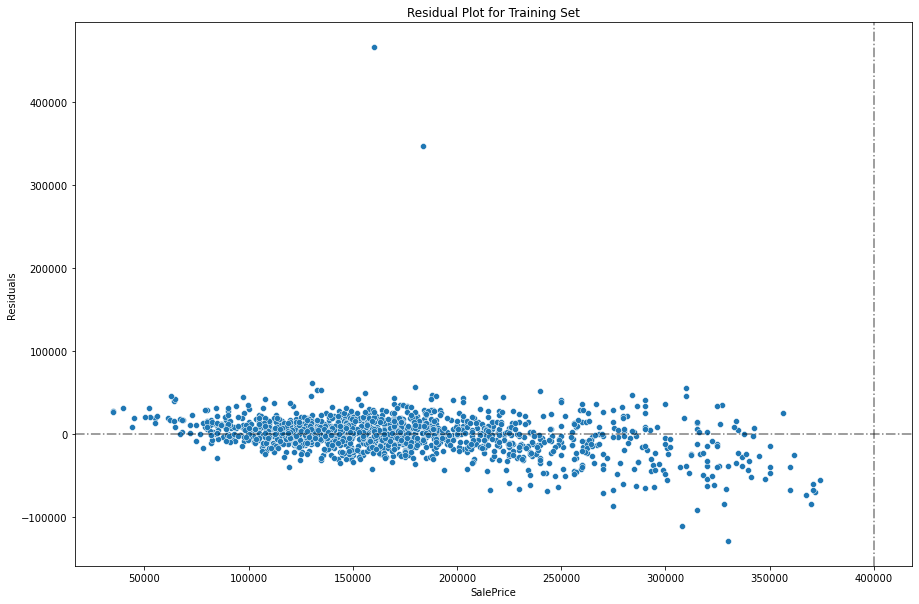

In [108]:
plt.figure(figsize=(15,10))
sns.scatterplot(y=residual, x=np.exp(y_train))
plt.title('Residual Plot for Training Set')
plt.xlabel('SalePrice')
plt.ylabel('Residuals')
plt.axhline(0, ls= '-.',color='k',alpha = 0.5)
plt.axvline(400000, ls= '-.',color='k',alpha = 0.5)
plt.savefig(fname='../project_2/images/Residual_plot.png');
plt.show()